In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('Downloads/salary_prediction.csv')
df1=pd.read_csv('Downloads/salary_prediction_test.csv')

#creating dataframe
data = {'Age(yrs)':  ['31'],
        'Gender': ['F'],
        'Qualification': ['B.E'],
        'no_of_experience_in_years': ['9'],
        'Area_of_work': ['Sw testing'],
        'salary_package_per_month': [' '],
        }
df2 = pd.DataFrame(data)

# Dataframes


In [3]:
#IT consit of two data frame one test=df1 and one train=df

In [4]:
df

,company,Age(yrs),Gender,Qualification,no_of_experience_in_years,Area_of_work,salary_package_per_month
0,ABBB,21,M,B.E,0.0,programming,30000
1,NaN,24,F,M.E,1.0,predective analysis,50000
2,NaN,30,M,M.E,5.0,cloud server management,120000
3,NaN,23,M,B.E,2.0,programming,42000
4,NaN,21,F,B.E,0.0,predective analysis,35000
...,...,...,...,...,...,...,...
159,NaN,41,F,B.E,18.0,predective analysis,1300000
160,NaN,42,F,B.E,18.0,predective analysis,1900000
161,NaN,42,F,B.E,21.0,cloud server management,2000000
162,NaN,42,F,B.E,21.0,cloud server management,2000000


In [5]:
df1

,Age(yrs),Gender,Qualification,no_of_experience_in_years,Area_of_work,salary_package_per_month
0,22,F,B.E,1,programming,NaN
1,21,M,B.E,0,predictive analysis,NaN
2,30,F,M.E,4,banking sw,NaN
3,28,M,M.E,3,Sw testing,NaN
4,24,F,M.E,1,cloud server management,NaN


In [6]:
df2

,Age(yrs),Gender,Qualification,no_of_experience_in_years,Area_of_work,salary_package_per_month
0,31,F,B.E,9,Sw testing,


In [7]:
df.shape

(164, 7)

In [8]:
df1.shape

(5, 6)

In [9]:
df2.shape

(1, 6)

# To check first 5 data dataset


In [10]:
df.head()

,company,Age(yrs),Gender,Qualification,no_of_experience_in_years,Area_of_work,salary_package_per_month
0,ABBB,21,M,B.E,0.0,programming,30000
1,NaN,24,F,M.E,1.0,predective analysis,50000
2,NaN,30,M,M.E,5.0,cloud server management,120000
3,NaN,23,M,B.E,2.0,programming,42000
4,NaN,21,F,B.E,0.0,predective analysis,35000


# To check the information/Describe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company                    13 non-null     object 
 1   Age(yrs)                   164 non-null    int64  
 2   Gender                     164 non-null    object 
 3   Qualification              164 non-null    object 
 4   no_of_experience_in_years  161 non-null    float64
 5   Area_of_work               164 non-null    object 
 6   salary_package_per_month   164 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 9.1+ KB


In [12]:
df.describe()

,Age(yrs),no_of_experience_in_years,salary_package_per_month
count,164.000000,161.000000,1.640000e+02
mean,30.323171,7.229814,4.026098e+05
std,6.351596,6.027280,4.382364e+05
min,21.000000,0.000000,2.500000e+04
25%,25.000000,2.000000,7.500000e+04
50%,30.000000,7.000000,2.000000e+05
75%,35.000000,11.000000,6.000000e+05
max,43.000000,21.000000,2.000000e+06


In [13]:
df['Gender'].value_counts()

F    86
M    78
Name: Gender, dtype: int64

In [14]:
df['Qualification'].value_counts()

B.E    85
M.E    79
Name: Qualification, dtype: int64

In [15]:
df['Area_of_work'].value_counts()

Sw testing                 42
predective analysis        37
programming                34
cloud server management    30
banking sw                 21
Name: Area_of_work, dtype: int64

# To check the null Values in dataframe

In [16]:
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [17]:
df.isnull().sum()

company                      151
Age(yrs)                       0
Gender                         0
Qualification                  0
no_of_experience_in_years      3
Area_of_work                   0
salary_package_per_month       0
dtype: int64

In [18]:
df.isnull().sum().sum()

154

# Converting Categorical data into numerical

In [19]:
#For train data
enc = OrdinalEncoder()
df[['Gender','Qualification', 'Area_of_work']] = enc.fit_transform(df[['Gender','Qualification', 'Area_of_work']])


In [20]:
df

,company,Age(yrs),Gender,Qualification,no_of_experience_in_years,Area_of_work,salary_package_per_month
0,ABBB,21,1.0,0.0,0.0,4.0,30000
1,NaN,24,0.0,1.0,1.0,3.0,50000
2,NaN,30,1.0,1.0,5.0,2.0,120000
3,NaN,23,1.0,0.0,2.0,4.0,42000
4,NaN,21,0.0,0.0,0.0,3.0,35000
...,...,...,...,...,...,...,...
159,NaN,41,0.0,0.0,18.0,3.0,1300000
160,NaN,42,0.0,0.0,18.0,3.0,1900000
161,NaN,42,0.0,0.0,21.0,2.0,2000000
162,NaN,42,0.0,0.0,21.0,2.0,2000000


In [21]:
#For test data
enc = OrdinalEncoder()
df1[['Gender','Qualification', 'Area_of_work']] = enc.fit_transform(df1[['Gender','Qualification', 'Area_of_work']])

In [22]:
df1

,Age(yrs),Gender,Qualification,no_of_experience_in_years,Area_of_work,salary_package_per_month
0,22,0.0,0.0,1,4.0,NaN
1,21,1.0,0.0,0,3.0,NaN
2,30,0.0,1.0,4,1.0,NaN
3,28,1.0,1.0,3,0.0,NaN
4,24,0.0,1.0,1,2.0,NaN


In [23]:
#For 2nd test data
enc = OrdinalEncoder()
df2[['Gender','Qualification', 'Area_of_work']] = enc.fit_transform(df2[['Gender','Qualification', 'Area_of_work']])

In [24]:
df2

,Age(yrs),Gender,Qualification,no_of_experience_in_years,Area_of_work,salary_package_per_month
0,31,0.0,0.0,9,0.0,


# Checking correlation

In [25]:
correlation_matrix=df.corr()
correlation_matrix

,Age(yrs),Gender,Qualification,no_of_experience_in_years,Area_of_work,salary_package_per_month
Age(yrs),1.000000,-0.220213,0.076065,0.954675,0.160739,0.678258
Gender,-0.220213,1.000000,0.108173,-0.230811,-0.221889,-0.164675
Qualification,0.076065,0.108173,1.000000,-0.116923,-0.156062,-0.281193
no_of_experience_in_years,0.954675,-0.230811,-0.116923,1.000000,0.136361,0.771924
Area_of_work,0.160739,-0.221889,-0.156062,0.136361,1.000000,0.003917
salary_package_per_month,0.678258,-0.164675,-0.281193,0.771924,0.003917,1.000000


In [26]:
correlation_matrix['salary_package_per_month'].sort_values(ascending=False)
#From here we can se that salary is highly dependent on the *no of experience in years*

salary_package_per_month     1.000000
no_of_experience_in_years    0.771924
Age(yrs)                     0.678258
Area_of_work                 0.003917
Gender                      -0.164675
Qualification               -0.281193
Name: salary_package_per_month, dtype: float64

# Scatter matrix to analyse the data

array([[<AxesSubplot:xlabel='salary_package_per_month', ylabel='salary_package_per_month'>,
        <AxesSubplot:xlabel='no_of_experience_in_years', ylabel='salary_package_per_month'>],
       [<AxesSubplot:xlabel='salary_package_per_month', ylabel='no_of_experience_in_years'>,
        <AxesSubplot:xlabel='no_of_experience_in_years', ylabel='no_of_experience_in_years'>]],
      dtype=object)

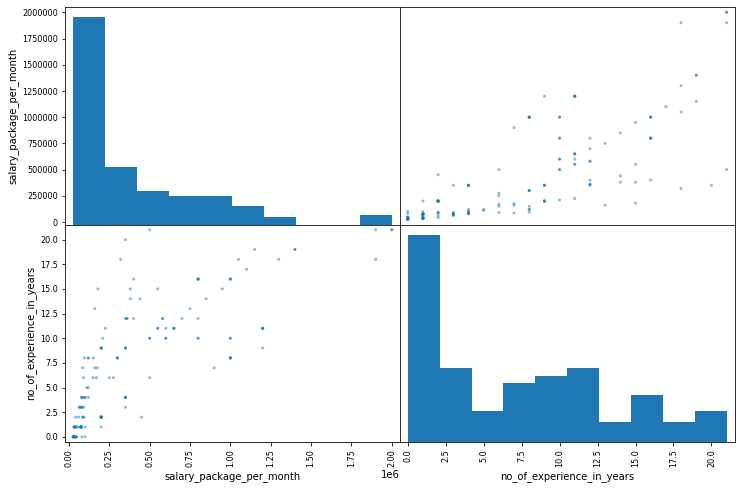

In [27]:
attributes=['salary_package_per_month','no_of_experience_in_years']
scatter_matrix(df[attributes],figsize=(12,8))

<AxesSubplot:xlabel='no_of_experience_in_years', ylabel='salary_package_per_month'>

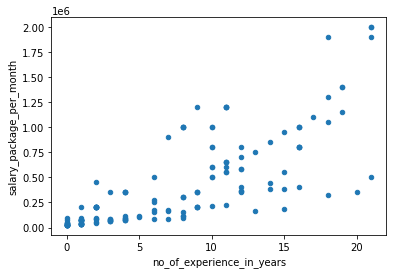

In [28]:
#alpha used for darker values in the plot
df.plot(kind='scatter',x='no_of_experience_in_years',y='salary_package_per_month',alpha=1)

<AxesSubplot:xlabel='Gender', ylabel='salary_package_per_month'>

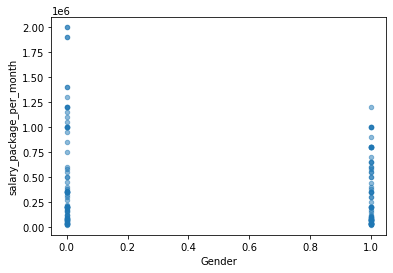

In [29]:
df.plot(kind='scatter',x='Gender',y='salary_package_per_month',alpha=.5)


<AxesSubplot:xlabel='Age(yrs)', ylabel='salary_package_per_month'>

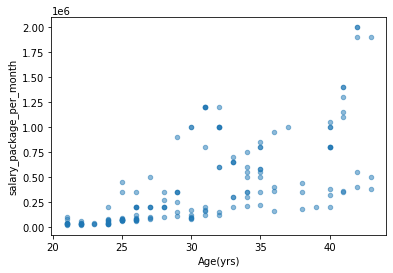

In [30]:
df.plot(kind='scatter',x='Age(yrs)',y='salary_package_per_month',alpha=.5)

# Data Cleaning

In [31]:
# As we have scene from above experience that we dont need column which have multiple null values so we will drop them

In [32]:
df.drop(['company'], axis=1, inplace=True)

In [33]:
df.shape

(164, 6)

In [34]:
#Checking unique value in experience
df['no_of_experience_in_years'].unique()

array([ 0.,  1.,  5.,  2.,  4.,  7.,  9.,  8.,  3., 10., 11., 13., 15.,
       18., 20., 21.,  6., 12., 16., 14., 19., nan, 17.])

In [35]:
#checking the data types 
df.dtypes

Age(yrs)                       int64
Gender                       float64
Qualification                float64
no_of_experience_in_years    float64
Area_of_work                 float64
salary_package_per_month       int64
dtype: object

In [36]:
# as no of experience in years is very important column and it has 3 null values so we will fill it using median
# because as we have seen above &When the data has more outliers, it's best to replace them with the median value.&
median=df['no_of_experience_in_years'].median()
median

7.0

In [37]:
df['no_of_experience_in_years'].fillna(median,inplace=True)
df.isnull().sum()

Age(yrs)                     0
Gender                       0
Qualification                0
no_of_experience_in_years    0
Area_of_work                 0
salary_package_per_month     0
dtype: int64

In [38]:
#To find Duplicate rows
df.duplicated(subset=None,keep='first').sum()

29

In [39]:
#To remove Duplicate rows
df.drop_duplicates(subset=None,keep='first',inplace=True)

In [40]:
df.shape


(135, 6)

# Train Test Split

In [41]:
# for test csv
x_test=df1[['Age(yrs)','no_of_experience_in_years','Qualification','Gender','Area_of_work']]


In [42]:
# for testing single dataframe df2
z_test=df2[['Age(yrs)','no_of_experience_in_years','Qualification','Gender','Area_of_work']]

In [43]:
x_train=df[['Age(yrs)','no_of_experience_in_years','Qualification','Gender','Area_of_work']]
y_train=df[['salary_package_per_month']]

In [44]:
lr=LinearRegression()


In [45]:
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pre=lr.predict(x_test)
y_pre

array([[ 21229.33686177],
       [ 37771.10519458],
       [139035.107338  ],
       [160616.93110383],
       [-48158.98179693]])

In [47]:
Y_pre=lr.predict(z_test)
Y_pre

array([[609105.83027112]])

In [48]:
# Accuracy for test data csv
lr.score(x_test,y_pre)

1.0

# Project Completed